In [59]:
import numpy as np
import seaborn as sns
import pandas as pd

In [60]:
subject_name = "Lea"


In [63]:
""" Load the data from the csv file and perform the analysis."""
df = pd.read_csv('error_angles_{}.csv'.format(subject_name))
df.trial_name.unique()

array(['No Perturbation', 'Sudden Perturbation', 'Aftereffect'],
      dtype=object)

In [72]:
""" Calulate the motor varibility or the std for each baseline and each trial."""
MV = df[df['trial_name'] == 'No Perturbation']['error_angles'].std()
print(np.degrees(MV))

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] != 'No Perturbation']['error_angles']))

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

trials_number_adapt = df[df['trial_name'] != 'No Perturbation'].trial_number
hue_trials = df[df['trial_name'] != 'No Perturbation'].changed_angels

0.005863955026017897


C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

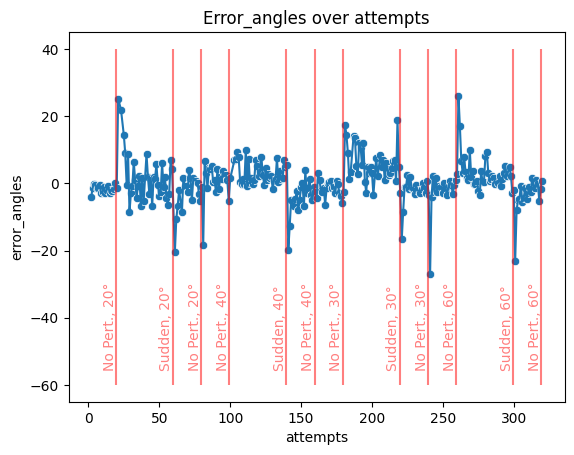

In [71]:
"""Plot the basic error angles over trial like last week"""

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11 = 0, 10, 30, 90,110, 130, 190,210, 230, 290,310
collect_attempts = [a2, a3, a4, a5, a6, a7, a8, a9, a10,a11]
string_attempts = [ 'test, 0°', 'No Pert., 50°', 'Gradual, 50°', 'No Pert., 50°',
                   'No Pert., -50°', 'Gradual, -50°', 'No Pert., -50°'
                   'No Pert., 100°', 'Gradual, 100°', 'No Pert., 100°']

attempts = 320


data = pd.read_csv("error_angles_"+ subject_name + ".csv")
data["error_angles"] = np.degrees(data["error_angles"])
g0 = sns.scatterplot(data = data, x = 'trial_number', y = 'error_angles') 
g0 = sns.lineplot(data = data, x = 'trial_number', y = 'error_angles')
""" Add vertical lines to show the different pertubation_types."""
g0.vlines(np.array(collect_attempts) - 0.5, ymin = -60, ymax = 40, color = 'red', alpha = 0.5)
""" Add labels to the vertical lines."""
for i in range(len(collect_attempts)):
    g0.text(collect_attempts[i] - 10, -55, string_attempts[i], rotation = 90, color = 'red', alpha = 0.5)
g0.set(xlabel='attempts', ylabel='error_angles', title = 'Error_angles over attempts')

g0.figure.savefig("error_angles_"+ subject_name + ".png")
g0.figure.savefig("error_angles_"+ subject_name + ".svg")

In [66]:
""" Quantify the aftereffect."""


trials_numer_aftereffect = df[df['trial_name'] == 'Aftereffect'].trial_number

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] == 'Aftereffect']['error_angles']))
hue_trials = df[df['trial_name'] == 'Aftereffect'].changed_angels

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

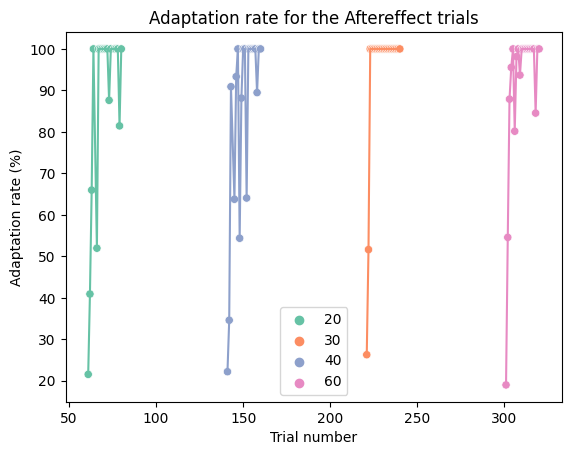

In [67]:
g0 = sns.scatterplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for the Aftereffect trials')


g0.figure.savefig("aftereffect_error_adaptation"+ str(df.subject_name.unique()[0]) + ".svg")
g0.figure.savefig("aftereffect_error_adaptation"+ str(df.subject_name.unique()[0]) + ".png")

In [68]:
""" Create a dataframe with the adaptation rate and the trial_number."""
trials_number_aftereffect = df[df['trial_name'] == 'Aftereffect'].trial_number
error_angles = df[df['trial_name'] == 'Aftereffect']['error_angles']

MV_error = np.abs(error_angles) / MV
hue_no_pert = df[df['trial_name'] == 'Aftereffect'].changed_angels


C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

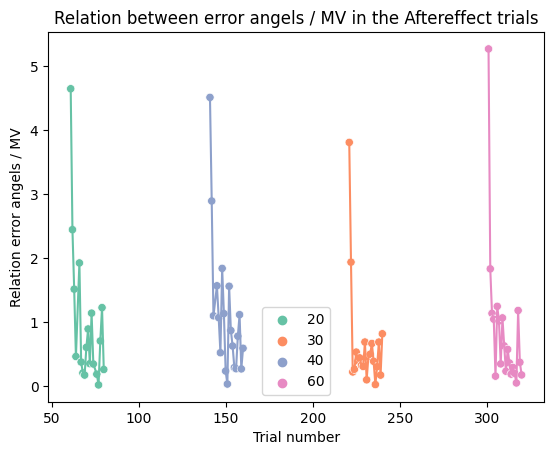

In [69]:
""" Quantify the aftereffect by calculating the relation between the error angels and the MV."""

g1 = sns.scatterplot(x= trials_number_aftereffect, y= MV_error, hue = hue_no_pert,  palette = 'Set2')

g1 = sns.lineplot(x= trials_number_aftereffect, y= MV_error, hue = hue_no_pert,  palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g1.get_legend_handles_labels()
g1.legend(handles=handles[:4], labels=labels[:4])

g1.set(xlabel='Trial number', ylabel='Relation error angels / MV', title = 'Relation between error angels / MV in the Aftereffect trials')

g1.figure.savefig("aftereffect_relation_error_MV"+ str(df.subject_name.unique()[0]) + ".svg")
g1.figure.savefig("aftereffect_relation_error_MV"+ str(df.subject_name.unique()[0]) + ".png")